In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from os import listdir
from os.path import isfile, join

## Merge labeled data into one file

In [3]:
mypath = '/Users/admin/Desktop/coding/Dementia_proj/SmartwatchData/labeled_data'
all_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

acc_files = [f for f in all_files if(f[-3:]=='csv' and f[0:3]=='acc')]
hr_files = [f for f in all_files if(f[-3:]=='csv' and f[0:2]=='hr')]

all_acc_data = []
all_labels = set()

for a in acc_files:
    a = "SmartwatchData/labeled_data/" + a
    f = open(a,"r")

    start = "SmartwatchData/labeled_data/acc_"
    
    for i in range(len(f.name)-1,0,-1):
        if(f.name[i]=='_'):
            s2 = i
            break
    stop = len(f.name) - s2

    label = f.name[:-stop]
    label = label[len(start):]
    all_labels.add(label)

    for line in f:
        e = line.strip('\n').split(',')   # Index, timestamp, x, y, z
        e.append(label)                   # Label
        
        if(e[2]!='x'):
            all_acc_data.append(e[1:])

In [4]:
with open('SmartwatchData/prep_data/labels.txt','w') as label_file:
    for item in all_labels:
        label_file.write(item + " ")

In [5]:
def sortfunc(elem):
    return elem[0]        # Sort by timestamp

all_acc_data.sort(key=sortfunc)

with open('SmartwatchData/prep_data/data_acc_2.csv','w') as data_file:
    writer = csv.writer(data_file)

    headers = ['date','time','x','y','z','label']
    writer.writerow(headers)

    for e in all_acc_data:
        date,time = e[0].split(' ')
        new_e = [date,time,e[1],e[2],e[3],e[4]]
        writer.writerow(new_e)

## Convert to DataFrame

In [6]:
filepath = 'SmartwatchData/prep_data/data_acc_cleaned.csv'
df = pd.read_csv(filepath)

df_grp = df.groupby('date')

idx = {}
dict_date = {}

for key,item in df_grp:
    dict_date[key] = df_grp.get_group(key)

dates = list(dict_date.keys())
cols = list(df.columns)

df

,date,time,x,y,z,label
0,2018-10-05,14:42:32.695,8.633491,-4.272453,3.456030,walking_down
1,2018-10-05,14:42:32.854,10.994174,-8.883685,0.171185,walking_down
2,2018-10-05,14:42:33.015,8.609549,-6.130354,1.985990,walking_down
3,2018-10-05,14:42:33.177,8.135497,-6.202179,2.895787,walking_down
4,2018-10-05,14:42:33.336,8.590396,-4.622006,1.650802,walking_down
5,2018-10-05,14:42:33.497,9.902418,-3.199851,0.300472,walking_down
6,2018-10-05,14:42:33.658,5.918467,-3.257311,0.899023,walking_down
7,2018-10-05,14:42:33.82,4.994305,-2.357092,1.966837,walking_down
8,2018-10-05,14:42:33.981,16.136919,-5.383362,4.030639,walking_down
9,2018-10-05,14:42:34.14,8.676587,-6.513426,3.877410,walking_down


In [7]:
print(all_labels)

{'sitting', 'running', 'standing', 'walking_down', 'laying', 'walking', 'walking_up'}


In [8]:
col_dict = {}
for i in range(len(cols)):
    col_dict[cols[i]] = i
    
print(col_dict)

{'date': 0, 'time': 1, 'x': 2, 'y': 3, 'z': 4, 'label': 5}


In [9]:
label_dict = {}

for label in all_labels:
    label_dict[label] = []
    
dtxyz = []
for k in col_dict.keys():
    if(k!='label'):
        dtxyz.append(k)      # dtxyz = ['date','time','x','y','z']
        
# label_dict {label -> dtxyz}
for i in range(len(df)):
    a_label = df.iloc[i,col_dict['label']]
    
    temp = []
    for e in dtxyz:
        temp.append(df.iloc[i,col_dict[e]])
    
    label_dict[a_label].append(temp)

## Bai's equation

In [10]:
std_i_bar = [0.00349329,0.00465817,0.00543154]
std_i_bar = np.array(std_i_bar)

print(std_i_bar)

[0.00349329 0.00465817 0.00543154]


In [11]:
def equation_bai(X_i):
    all_std = []
    
    std_i = np.std(X_i,axis=0)
    diff_std = std_i**2 - std_i_bar**2
    diff_std = (diff_std + 1) / (std_i_bar**2 + 1)

    all_std.append(diff_std)
    
    all_std = np.array(all_std)
    
    ai = np.sum(all_std**2,axis=1)/3
    ai[ai<0] = 0
    ai = np.sqrt(ai)
    
    return ai

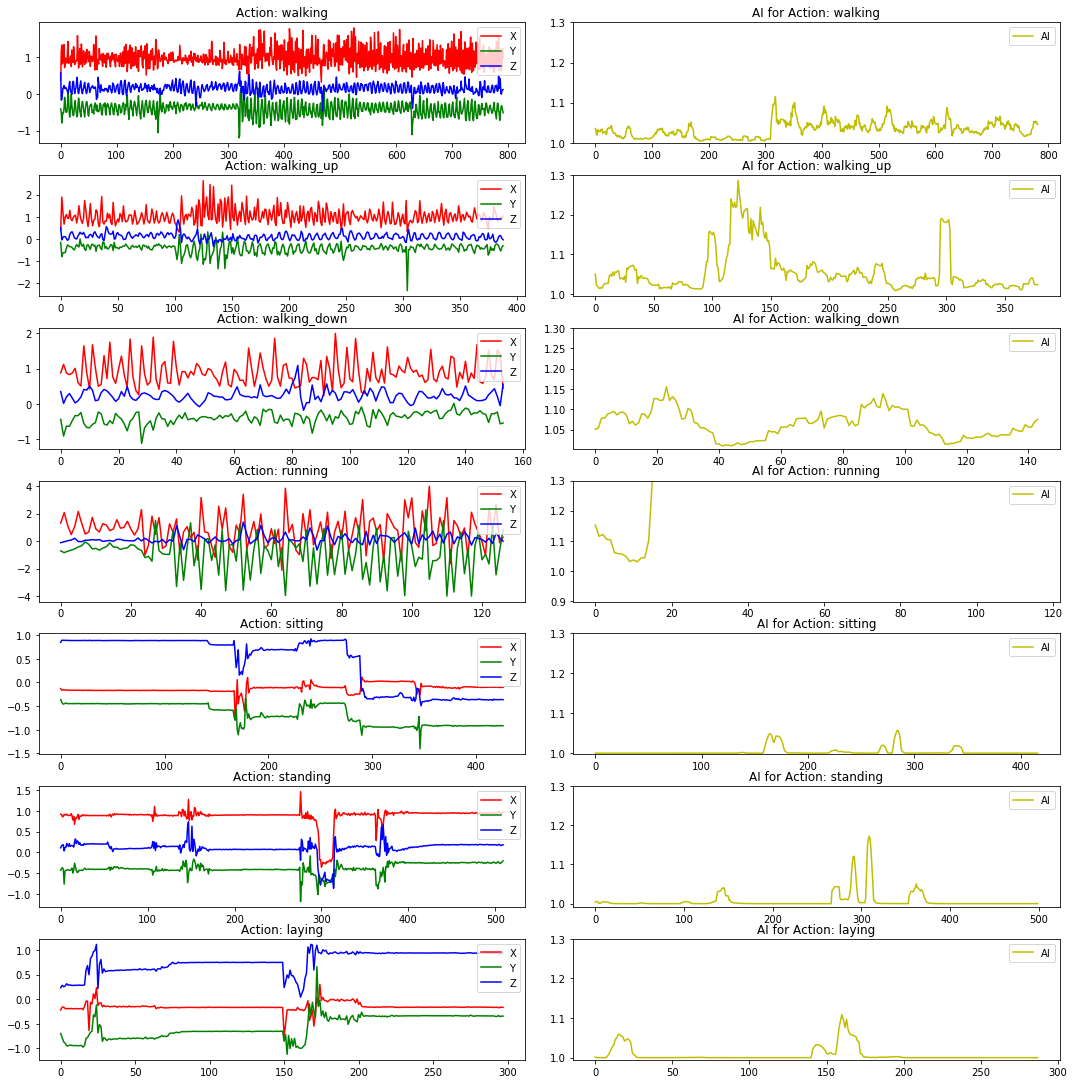

<Figure size 1152x648 with 0 Axes>

In [15]:
ai_label = []
label_names = ['walking','walking_up','walking_down','running','sitting','standing','laying']

fig, axes = plt.subplots(nrows=len(label_names), ncols=2, figsize=(15,15))
fig.tight_layout()

for ln in range(len(label_names)):
    label = label_names[ln]
    
    x_val = []
    y_val = []
    z_val = []
    xyz_val = []
    
    ai = []
    
    H = 10     # window size
    g = 9.8
    
    for e in label_dict[label]:
        x_val.append(e[2])
        y_val.append(e[3])
        z_val.append(e[4])
        xyz_val.append([e[2],e[3],e[4]])
        
    x_val = np.array(x_val)/g
    y_val = np.array(y_val)/g
    z_val = np.array(z_val)/g
    xyz_val = np.array(xyz_val)/g
    
    
    for i in range(len(xyz_val)):
        xyz_arr = []
        if(i-H>=0):
            for k in range(H-1,0,-1):
                xyz_arr.append(xyz_val[i-k])
            ai_val = equation_bai(xyz_arr)
            ai.append(ai_val[0])
            
    ai_label.append(ai)
    
    ax = axes[ln,0]
    ax.plot(x_val,'r',label='X')
    ax.plot(y_val,'g',label='Y')
    ax.plot(z_val,'b',label='Z')
    ax.set_title('Action: ' + label_names[ln])
#     ax.set_ylim(bottom=-2,top=2)
    ax.legend(loc='upper right')

for i in range(len(ai_label)):
    ax = axes[i,1]
    ax.plot(ai_label[i],'y',label='AI')
    ax.set_title('AI for Action: ' + label_names[i])
    ax.legend(loc='upper right')
    ax.set_ylim(top=1.3)

plt.figure(figsize=(16,9))
fig.savefig('fig1.png', dpi = 300)
plt.show()

## Z-score per activity

In [ ]:
ai_lb_cc = ai_label[0] + ai_label[1]
for i in range(2,len(ai_label)):
    ai_lb_cc += ai_label[i]
    
ai_mean = np.mean(ai_lb_cc)
ai_sd = np.mean(ai_lb_cc)
    
for i in range(len(ai_label)):
    z = [(x-ai_mean)/ai_sd for x in ai_label[i]]
    z_mean = np.mean(z)
    
    print(label_names[i],':',z_mean)